In [23]:
import pickle
import pandas as pd
from scipy.stats import gmean
import matplotlib.pyplot as plt

# Vanilla (learning rate)

In [24]:
with open("../data/optuna_studies/vanilla_optuna.pkl", "rb") as study_file:
    study_lambda_only = pickle.load(study_file)

In [25]:
lambda_only_df = pd.DataFrame({
    "learning rate": [trial.params["learning rate"] for trial in study_lambda_only.get_trials()],
    "accuracy": [trial.values[0] for trial in study_lambda_only.get_trials()]
}).sort_values("learning rate").reset_index(drop=True)

lambda_only_df["lr_qcuts"] = pd.qcut(lambda_only_df["learning rate"], 8)

In [26]:
lambda_only_median_gb = lambda_only_df.groupby("lr_qcuts")

mean_x = lambda_only_median_gb["learning rate"].apply(gmean).to_numpy()
mean_y = lambda_only_median_gb["accuracy"].mean().to_numpy()

/tmp/ipykernel_46910/2777205349.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lambda_only_median_gb = lambda_only_df.groupby("lr_qcuts")


In [27]:
x_max = study_lambda_only.best_params["learning rate"]
y_max = lambda_only_df["accuracy"].max()

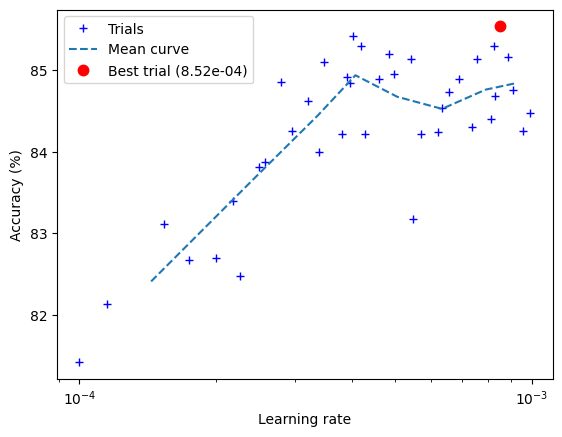

In [28]:
plt.plot(lambda_only_df["learning rate"], 100*lambda_only_df["accuracy"], "b+", label="Trials")
plt.plot(mean_x, 100*mean_y, "--", label="Mean curve")
plt.plot([x_max], [100*y_max], "r.", markersize=15, label=f"Best trial ({x_max:.2e})")
plt.xscale("log")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy (%)")
plt.legend()

# L1 (lambda only)

In [29]:
with open("../data/optuna_studies/L1_reg_optuna_lambda_only.pkl", "rb") as study_file:
    study_lambda_only = pickle.load(study_file)

In [30]:
lambda_only_df = pd.DataFrame({
    "lambda": [trial.params["L1 lambda"] for trial in study_lambda_only.get_trials()],
    "accuracy": [trial.values[0] for trial in study_lambda_only.get_trials()]
}).sort_values("lambda").reset_index(drop=True)

lambda_only_df["lambda_qcuts"] = pd.qcut(lambda_only_df["lambda"], 7)

In [31]:
lambda_only_median_gb = lambda_only_df.groupby("lambda_qcuts")

mean_x = lambda_only_median_gb["lambda"].apply(gmean).to_numpy()
mean_y = lambda_only_median_gb["accuracy"].mean().to_numpy()

/tmp/ipykernel_46910/137999939.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lambda_only_median_gb = lambda_only_df.groupby("lambda_qcuts")


In [32]:
x_max = study_lambda_only.best_params["L1 lambda"]
y_max = lambda_only_df["accuracy"].max()

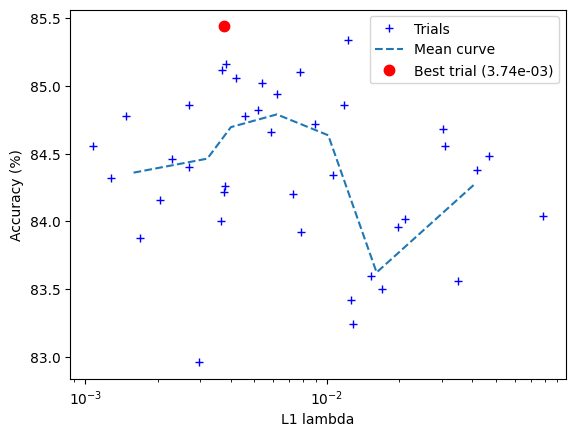

In [33]:
plt.plot(lambda_only_df["lambda"], 100*lambda_only_df["accuracy"], "b+", label="Trials")
plt.plot(mean_x, 100*mean_y, "--", label="Mean curve")
plt.plot([x_max], [100*y_max], "r.", markersize=15, label=f"Best trial ({x_max:.2e})")
plt.xscale("log")
plt.xlabel("L1 lambda")
plt.ylabel("Accuracy (%)")
plt.legend()